In [2]:
import numpy as np
import pandas as pd
import re

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
#import pyLDAvis
#import pyLDAvis.sklearn

In [3]:
# Import Dataset
#df = pd.read_csv('his_com')

chunk = pd.read_csv('POM90.csv', chunksize=1000000)
df = pd.concat(chunk)
pd.set_option('display.max_colwidth', None)
print(df.shape)

(1083471, 4)


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#df['com_prepr'] = df['com'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

#library that contains punctuation
import string

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['com_prepr']= df['com'].apply(lambda x:remove_punctuation(x))

df['com_prepr']= df['com_prepr'].apply(lambda x: x.lower())

#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopWords(s):
    s = ' '.join(word for word in s.split() if word not in stopwords)
    return s

df['com_prepr'] = df['com_prepr'].apply(lambda x: remove_stopWords(x))

In [56]:
data = df['com_prepr'].values.tolist()

In [57]:
import re

chinese = re.findall(r'[\u4e00-\u9fff]+',long_string)

In [59]:
# from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['com_prepr'].values))

In [195]:
# Create a WordCloud object
wordcloud = WordCloud(max_words=7000, 
                      include_numbers=True, 
                      background_color='white',
                      width=1300, height=1000,
                      min_word_length=2,
                      min_font_size=10,
                      stopwords=chinese,
                      colormap='winter')

In [196]:
# Generate a word cloud
wordcloud.generate(long_string)

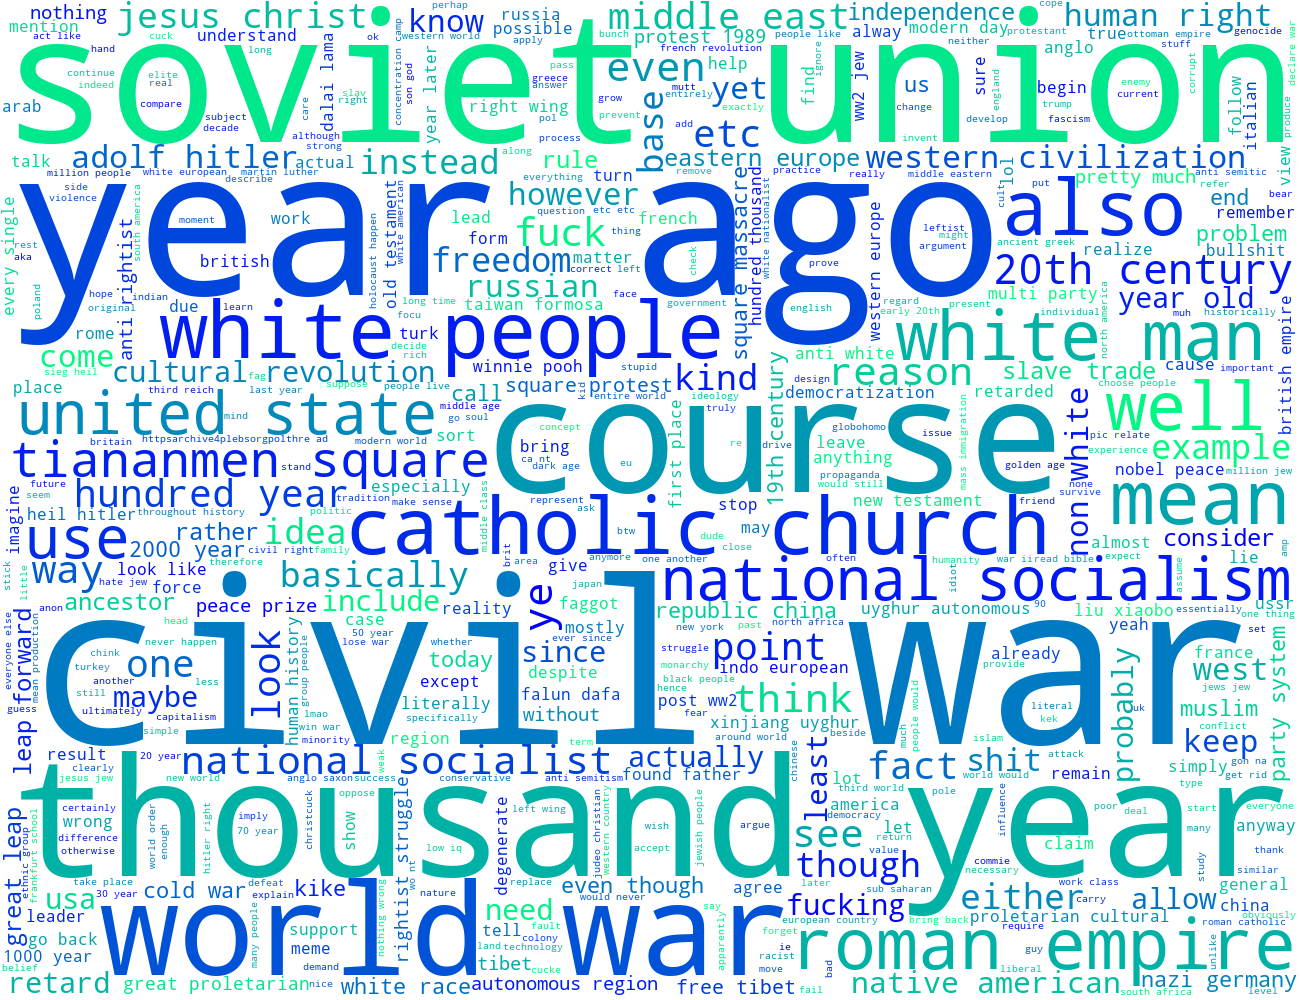

In [197]:
# Visualize the word cloud
wordcloud.to_image()

In [198]:
wordcloud.to_file('word_cloud.png')

In [6]:
vectorizer = CountVectorizer(lowercase=True, min_df=2, ngram_range=(1, 3))

data_vectorized = vectorizer.fit_transform(data)

In [7]:
data_vectorized.shape

(6498063, 20005176)

In [7]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(data_vectorized, test_size=0.25, random_state=1488)

In [12]:
#print(train.shape)
#print(test.shape)

(812603, 6123550)
(270868, 6123550)


In [ ]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(data, test_size=0.25, random_state=1488)

In [ ]:
#vectorizer = CountVectorizer(lowercase=True, min_df=2, ngram_range=(1, 3))

#train_dtm = vectorizer.fit_transform(train)
#test_dtm = vectorizer.transform(test)

In [ ]:
#print(train_dtm.shape)
#print(test_dtm.shape)

In [8]:
lda_model = LatentDirichletAllocation(n_components=100, n_jobs=3, verbose=3, random_state=1488, max_iter=5)

In [ ]:
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


In [ ]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

In [ ]:
lda_model = LatentDirichletAllocation(n_components=150, n_jobs=2, verbose=3, random_state=1488, max_iter=5)

In [ ]:
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

In [ ]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

In [22]:
# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic["dominant_topic"] = dominant_topic
# Styling
def color_green(val):
 color = "green" if val > .1 else "black"
 return "color: {col}".format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return "font-weight: {weight}".format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27,Topic28,Topic29,Topic30,Topic31,Topic32,Topic33,Topic34,Topic35,Topic36,Topic37,Topic38,Topic39,Topic40,Topic41,Topic42,Topic43,Topic44,Topic45,Topic46,Topic47,Topic48,Topic49,Topic50,Topic51,Topic52,Topic53,Topic54,Topic55,Topic56,Topic57,Topic58,Topic59,Topic60,Topic61,Topic62,Topic63,Topic64,Topic65,Topic66,Topic67,Topic68,Topic69,Topic70,Topic71,Topic72,Topic73,Topic74,Topic75,Topic76,Topic77,Topic78,Topic79,Topic80,Topic81,Topic82,Topic83,Topic84,Topic85,Topic86,Topic87,Topic88,Topic89,Topic90,Topic91,Topic92,Topic93,Topic94,Topic95,Topic96,Topic97,Topic98,Topic99,Topic100,Topic101,Topic102,Topic103,Topic104,Topic105,Topic106,Topic107,Topic108,Topic109,Topic110,Topic111,Topic112,Topic113,Topic114,Topic115,Topic116,Topic117,Topic118,Topic119,dominant_topic
Doc0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,67
Doc1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67
Doc2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [23]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names_out()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

,00,00 10,00 90,00 always,00 basically,00 billion,00 billion relationship,00 black,00 early,00 early 10,...,𐬨𐬌𐬚𐬭𐬀 miθra old,𐭠𐭩𐭥𐭠𐭭,𐭠𐭩𐭥𐭠𐭭𐭱𐭲𐭥𐭩,𒀭𒂗𒆠,𒅆𒍑,𒅆𒍑 sius,𒅆𒍑 sius hittite,𒌓𒍣,𒌓𒍣 character,𒌓𒍣 character ancient
Topic0,1.874137,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
Topic1,2.846551,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
Topic2,1.882738,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
Topic3,0.113879,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
Topic4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [24]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,slave,slavery,trade,owner,america,slave trade,state,jews,white,free,slave owner,us,year,build,labor
Topic 1,germany,hitler,national,german,people,nazi,one,must,world,mein,kampf,mein kampf,country,socialism,adolf
Topic 2,socialism,national,socialist,national socialism,capitalism,national socialist,communism,hitler,fascism,one,ideology,people,marxism,marxist,state
Topic 3,empire,know,one,british,people,country,like,jews,jewish,state,year,roosevelt,see,would,create
Topic 4,camp,extermination,chamber,gas,gas chamber,year,hitler,germany,extermination camp,german,war,evidence,find,auschwitz,claim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Topic 115,people,law,pharisee,know,judaism,even,christianity,come,one,history,mean,get,make,time,original
Topic 116,king,would,god,people,world,jesus,man,one,come,also,know,time,take,anti,history
Topic 117,class,work,communism,capitalist,marxism,society,state,work class,stage,marx,leninism,rx,httpswwwmarxistsorgarchivema rx,httpswwwmarxistsorgarchivema,follow
Topic 118,union,soviet,soviet union,like,people,year,country,collapse,even,say,israel,one,also,history,world


In [33]:
n_samples = 1083471
n_features = 6123550
n_components = 120
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(24, 5, figsize=(30, 200), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [34]:
import matplotlib.pyplot as plt

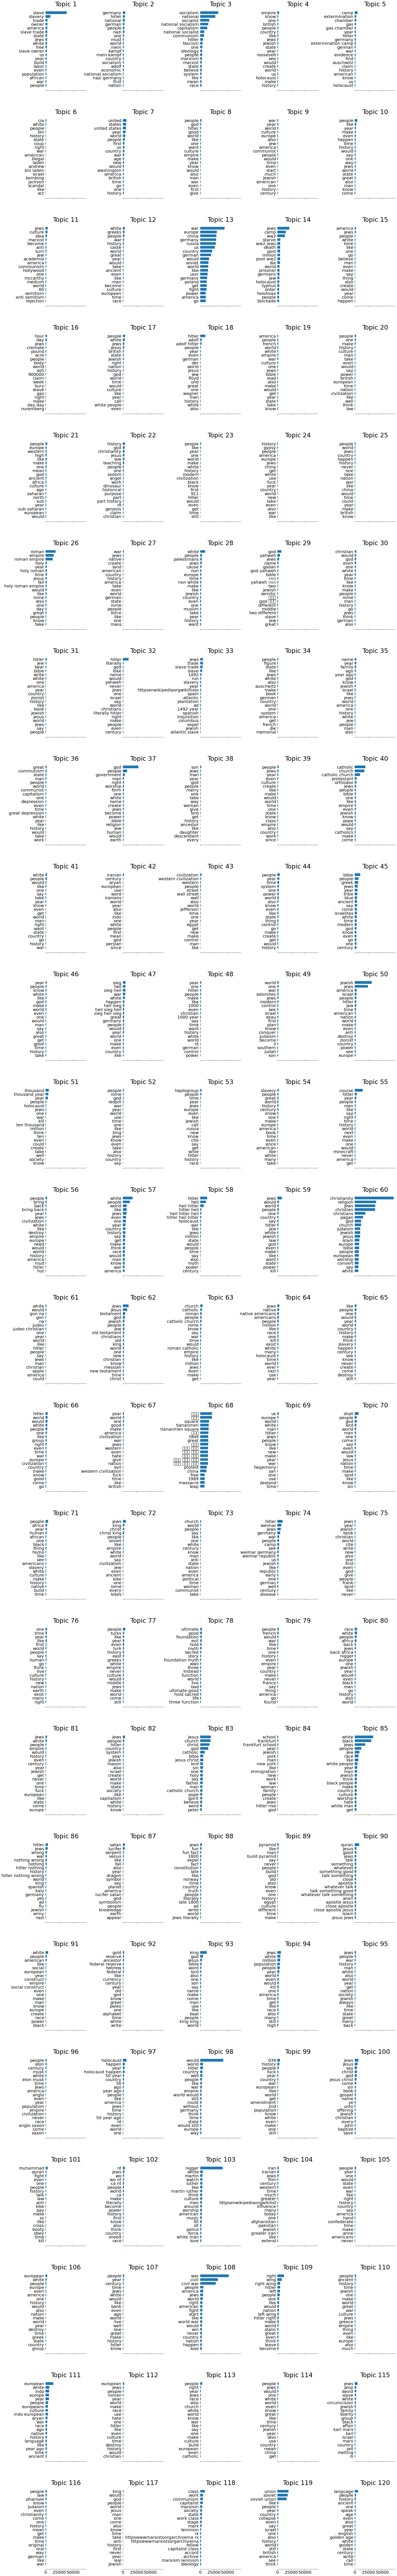

In [35]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda_model, feature_names, n_top_words, "Topics in LDA model")

In [253]:
#max_iter=5
components_range = [10, 15, 20, 30, 40, 50, 55, 60, 65, 70, 80, 90, 150]

components_perp_scores = [135705.59742459934, 131077.91158225204, 126644.46651766158, 124120.42310161678, 123280.58723013692, 123194.55792636004, 122953.31532344682, 122856.32301804722, 122863.0238023052, 123147.11488042488, 123772.66053729245, 124157.46393706097, 125720.90203430138]

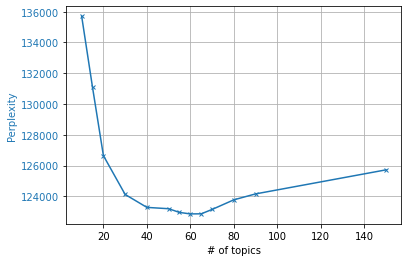

In [260]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('# of topics')
ax1.set_ylabel('Perplexity', color=color)
ax1.plot(components_range, components_perp_scores, marker='x', markersize=4, color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.grid(True)

plt.show()

In [261]:
fig.savefig('LDA_comp_opt.png', dpi=300)